In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=r"C:\Users\USER\Downloads\iris.csv"
df=pd.read_csv(data)

In [6]:
print(df.shape)
df.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
Y.dtypes
y_train.head()

81     Iris-versicolor
133     Iris-virginica
137     Iris-virginica
75     Iris-versicolor
109     Iris-virginica
Name: Species, dtype: object

In [8]:
from sklearn import preprocessing
lab_enc=preprocessing.LabelEncoder()
df['Species']=lab_enc.fit_transform(df['Species'])
df['Species'].unique()

array([0, 1, 2])

In [13]:
X=df.drop(['Species'],axis=1)
Y=df['Species']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape

((105, 5), (45, 5))

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
iris_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [18]:
iris_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [19]:
y_pred = iris_gini.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 1.0000


In [24]:
y_pred_train_gini = iris_gini.predict(x_train)
y_pred_train_gini

array([1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0,
       1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [25]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 1.0000


[Text(401.76000000000005, 362.4, 'X[0] <= 100.5\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(267.84000000000003, 217.44, 'X[4] <= 0.8\ngini = 0.496\nsamples = 68\nvalue = [31, 37, 0]'),
 Text(133.92000000000002, 72.47999999999996, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(401.76000000000005, 72.47999999999996, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(535.6800000000001, 217.44, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

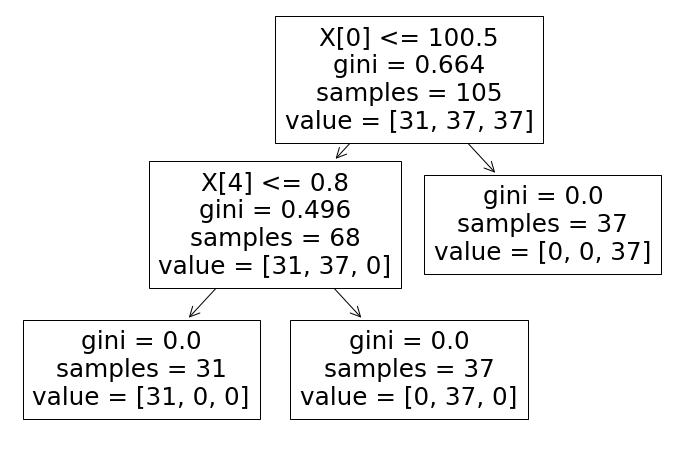

In [26]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(iris_gini.fit(x_train, y_train))

In [29]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

